## Business Understanding

**RFM Customer Segmentation & Cohort Analysis**. 

Using the [Online Retail dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail) from the UCI Machine Learning Repository for exploratory data analysis, ***Customer Segmentation***, ***RFM Analysis***, ***K-Means Clustering*** and ***Cohort Analysis*** will be performed.

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Info about features are as follows:

**InvoiceNo**: Invoice number. *Nominal*, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
<br>
**StockCode**: Product (item) code. *Nominal*, a 5-digit integral number uniquely assigned to each distinct product.
<br>
**Description**: Product (item) name. *Nominal*. 
<br>
**Quantity**: The quantities of each product (item) per transaction. *Numeric*.
<br>
**InvoiceDate**: Invoice Date and time. *Numeric*, the day and time when each transaction was generated.
<br>
**UnitPrice**: Unit price. *Numeric*, Product price per unit in sterling.
<br>
**CustomerID**: Customer number. *Nominal*, a 5-digit integral number uniquely assigned to each customer.
<br>
**Country**: Country name. *Nominal*, the name of the country where each customer resides.


---


First of all, to observe the structure of the data and missing values, we can use exploratory data analysis and data visualization techniques.

we must do descriptive analysis. Because we must understand the relationship of the features to each other and clear the noise and missing values in the data. After that, the data set will be ready for RFM analysis.

Before starting the RFM Analysis, we will be asked to do some analysis regarding the distribution of *Orders*, *Customers* and *Countries*. These analyzes will help the company develop its sales policies and contribute to the correct use of resources.

we will notice that the UK not only has the most sales revenue, but also the most customers. So we will continue to analyze only UK transactions in the next RFM Analysis, Customer Segmentation and K-Means Clustering topics.

Next, we will begin RFM Analysis, a customer segmentation technique based on customers' past purchasing behavior. 

By using RFM Analysis, we can enable companies to develop different approaches to different customer segments so that they can get to know their customers better, observe trends better, and increase customer retention and sales revenues.

we will calculate the Recency, Frequency and Monetary values of the customers in the RFM Analysis we will make using the data consisting of UK transactions. Ultimately, we have to create an RFM table containing these values.

In the Customer Segmentation section, we will create an RFM Segmentation Table where we segment wer customers by using the RFM table. For example, we can label the best customer as "Big Spenders" and the lost customer as "Lost Customer".

We will segment the customers ourselves based on their recency, frequency, and monetary values. But can an **unsupervised learning** model do this better for us? we will use the K-Means algorithm to find the answer to this question. Then we will compare the classification made by the algorithm with the classification we have made werself.

Before applying K-Means Clustering, we should do data pre-processing. In this context, it will be useful to examine feature correlations and distributions. In addition, the data we apply for K-Means should be normalized.

On the other hand, we should inform the K-means algorithm about the number of clusters it will predict. we will also try the *** Elbow method *** and *** Silhouette Analysis *** to find the optimum number of clusters.

After the above operations, we will have made cluster estimation with K-Means. we should visualize the cluster distribution by using a scatter plot. we can observe the properties of the resulting clusters with the help of the boxplot. Thus we will be able to tag clusters and interpret results.

Finally, we will do Cohort Analysis with the data we used at the beginning, regardless of the analysis we have done before. Cohort analysis is a subset of behavioral analytics that takes the user data and breaks them into related groups for analysis. This analysis can further be used to do customer segmentation and track metrics like retention, churn, and lifetime value.


## Project Structures

- Data Cleaning & Exploratory Data Analysis
- RFM Analysis
- Customer Segmentation
- Applying K-Means Clustering
- Create Cohort and Conduct Cohort Analysis

## 1. Data Cleaning & Exploratory Data Analysis

### Import Modules, Load Data & Data Review

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [187]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom


In [186]:
df.shape

(401604, 9)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [70]:
# Let's first check for any duplicate records
print(f'Duplicate items in this dataset is: {df.duplicated().sum()}')

Duplicate items in this dataset is: 5268


In [71]:
# Drop duplicate records
df = df[~df.duplicated()]
df.shape

(536641, 8)

In [72]:
print('Number of unique Invoice No: {}'.format(len(df.InvoiceNo.unique())))
print('Number of unique StockCode: {}'.format(len(df.StockCode.unique())))
print('Number of different Description: {}'.format(len(df.Description.unique())))
print('Number of unique Customer Id: {}'.format(len(df.CustomerID.unique())))
print('Number of different Countries: {}'.format(len(df.Country.unique())))

Number of unique Invoice No: 25900
Number of unique StockCode: 4070
Number of different Description: 4224
Number of unique Customer Id: 4373
Number of different Countries: 38


In [73]:
df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2357
REGENCY CAKESTAND 3 TIER              2189
JUMBO BAG RED RETROSPOT               2156
PARTY BUNTING                         1720
LUNCH BAG RED RETROSPOT               1625
Name: Description, dtype: int64

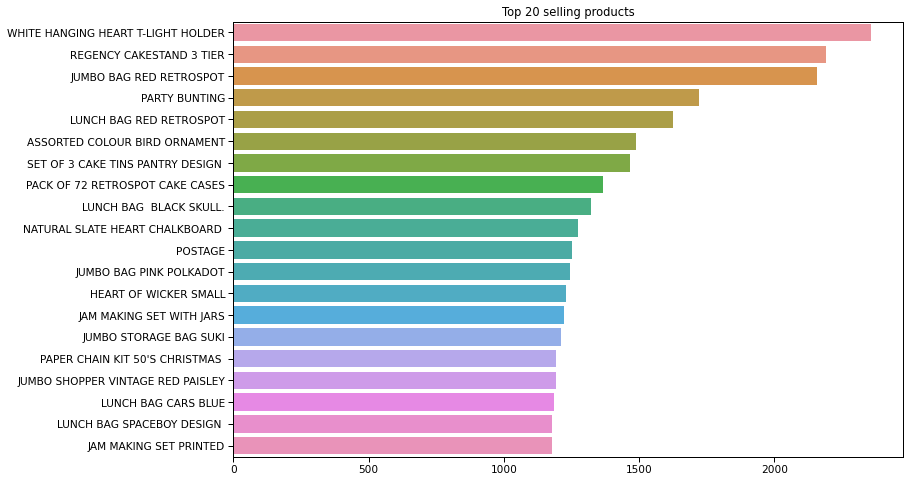

In [74]:
top_prod = df['Description'].value_counts()[:20]
plt.figure(figsize=(12,8))
sns.set_context("paper", font_scale=1.2)
sns.barplot(y = top_prod.index,
            x = top_prod.values)
plt.title("Top 20 selling products")
plt.show();

In [75]:
# Try to sort each item based on their total quantity
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head(10)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53751
JUMBO BAG RED RETROSPOT,47260
POPCORN HOLDER,36322
ASSORTED COLOUR BIRD ORNAMENT,36282
PACK OF 72 RETROSPOT CAKE CASES,36016
WHITE HANGING HEART T-LIGHT HOLDER,35298
RABBIT NIGHT LIGHT,30631
MINI PAINT SET VINTAGE,26437
PACK OF 12 LONDON TISSUES,26299


In [76]:
# Total price for each unique item sold
df["TotalPrice"] = df["Quantity"]*df["UnitPrice"] 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,17850,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,17850,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom,20


### Handling Missing Values

In [77]:
def missing_values(df):
   
        mis_val = df.isnull().sum()        
        mis_val_percent = 100 * df.isnull().sum() / len(df)        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)        
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})        
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)        
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"+"There are " + str(mis_val_table_ren_columns.shape[0]) +" columns that have missing values.")        
        return mis_val_table_ren_columns
    
missing_values(df)

Dataframe has 9 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
CustomerID,135037,25
Description,1454,0


In [78]:
df= df.dropna(subset=['CustomerID', 'Description'])
df.shape

(401604, 9)

### Cancelled Items

In [79]:
# To find out cancelled sales, invoices having 'C' at the start are the returns
df[df.InvoiceNo.str.contains("C", na = False)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,28,14527,United Kingdom,-28
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,5,15311,United Kingdom,-5
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,2,17548,United Kingdom,-20
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0,17548,United Kingdom,-7
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0,17548,United Kingdom,-7


In [80]:
df[df.InvoiceNo.str.contains("C", na = False)].count()

InvoiceNo      8872
StockCode      8872
Description    8872
Quantity       8872
InvoiceDate    8872
UnitPrice      8872
CustomerID     8872
Country        8872
TotalPrice     8872
dtype: int64

In [81]:
# To find out the items having the most money refunded
df[df.InvoiceNo.str.contains("C", na = False)].groupby("Description").agg({"TotalPrice":"sum"}).sort_values("TotalPrice", ascending = True).head(10)

,TotalPrice
Description,
"PAPER CRAFT , LITTLE BIRDIE",-168470
Manual,-112165
MEDIUM CERAMIC TOP STORAGE JAR,-77480
POSTAGE,-11094
REGENCY CAKESTAND 3 TIER,-9697
CRUK Commission,-7933
WHITE HANGING HEART T-LIGHT HOLDER,-6624
FAIRY CAKE FLANNEL ASSORTED COLOUR,-6591
Discount,-5696


In [83]:
df[df.InvoiceNo.str.contains("C", na = False)].groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = True).head(10)

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",-80995
MEDIUM CERAMIC TOP STORAGE JAR,-74494
ROTATING SILVER ANGELS T-LIGHT HLDR,-9367
Manual,-3995
FAIRY CAKE FLANNEL ASSORTED COLOUR,-3150
WHITE HANGING HEART T-LIGHT HOLDER,-2578
GIN + TONIC DIET METAL SIGN,-2030
HERB MARKER BASIL,-1527
FELTCRAFT DOLL MOLLY,-1447


In [86]:
df[~df.InvoiceNo.str.contains("C", na = False)].count()

InvoiceNo      392732
StockCode      392732
Description    392732
Quantity       392732
InvoiceDate    392732
UnitPrice      392732
CustomerID     392732
Country        392732
TotalPrice     392732
dtype: int64

In [29]:
df[(df['Quantity']>0)].count()

InvoiceNo      392732
StockCode      392732
Description    392732
Quantity       392732
InvoiceDate    392732
UnitPrice      392732
CustomerID     392732
Country        392732
TotalPrice     392732
dtype: int64

In [87]:
df[(df['TotalPrice']>0)].count()

InvoiceNo      392692
StockCode      392692
Description    392692
Quantity       392692
InvoiceDate    392692
UnitPrice      392692
CustomerID     392692
Country        392692
TotalPrice     392692
dtype: int64

In [88]:
df_new = df[(df['Quantity']>0)]

In [89]:
df_new.shape

(392732, 9)

### Explore Customers by Country

In [90]:
df_new["Country"].value_counts().head()

United Kingdom    349227
Germany             9027
France              8327
EIRE                7228
Spain               2480
Name: Country, dtype: int64

In [91]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df_new.groupby("Country").agg({"TotalPrice":"sum"}).sort_values("TotalPrice", ascending = False).head()

,TotalPrice
Country,
United Kingdom,7285025
Netherlands,285446
EIRE,265262
Germany,228678
France,208934


#### The UK not only has the most sales revenue, but also the most customers. Since the majority of this data set contains orders from the UK, we can explore the UK market further by finding out what products the customers buy together and any other buying behaviors to improve our sales and targeting strategy.

### Selecting and Exploring the UK Market


In [92]:
df_uk = df_new[df_new.Country == 'United Kingdom']
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,17850,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,17850,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom,20


In [93]:
df_uk.shape

(349227, 9)

2. What are the most popular products that are bought in the UK?

In [94]:
df_uk["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    1929
JUMBO BAG RED RETROSPOT               1461
REGENCY CAKESTAND 3 TIER              1417
ASSORTED COLOUR BIRD ORNAMENT         1320
PARTY BUNTING                         1301
Name: Description, dtype: int64

In [95]:
df_uk.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head(10)

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,76919
WORLD WAR 2 GLIDERS ASSTD DESIGNS,49086
JUMBO BAG RED RETROSPOT,41878
WHITE HANGING HEART T-LIGHT HOLDER,34630
ASSORTED COLOUR BIRD ORNAMENT,32628
POPCORN HOLDER,28923
PACK OF 12 LONDON TISSUES,24321
BROCADE RING PURSE,22675


# 2. RFM Analysis

In the age of the internet and e-commerce, companies that do not expand their businesses online or utilize digital tools to reach their customers will run into issues like scalability and a lack of digital precsence. An important marketing strategy e-commerce businesses use for analyzing and predicting customer value is customer segmentation. Customer data is used to sort customers into group based on their behaviors and preferences.

**[RFM](https://www.putler.com/rfm-analysis/) (Recency, Frequency, Monetary) Analysis** is a customer segmentation technique for analyzing customer value based on past buying behavior. RFM analysis was first used by the direct mail industry more than four decades ago, yet it is still an effective way to optimize wer marketing.
<br>
<br>
Our goal in this Notebook is to cluster the customers in our data set to:
 - Recognize who are our most valuable customers
 - Increase revenue
 - Increase customer retention
 - Learn more about the trends and behaviors of our customers
 - Define customers that are at risk

We will start with **RFM Analysis** and then compliment our findings with predictive analysis using **K-Means Clustering Algorithms.**

- RECENCY (R): Time since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total monetary value




Benefits of RFM Analysis

- Increased customer retention
- Increased response rate
- Increased conversion rate
- Increased revenue

RFM Analysis answers the following questions:
 - Who are our best customers?
 - Who has the potential to be converted into more profitable customers?
 - Which customers do we need to retain?
 - Which group of customers is most likely to respond to our marketing campaign?
 

In [96]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,17850,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,17850,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom,20


In [98]:
df_uk["InvoiceDate"]=df_uk["InvoiceDate"].dt.date

In [99]:
# Lets see the last date available in our dataset
todays_date=df_uk['InvoiceDate'].max()
todays_date

datetime.date(2011, 12, 9)

In [100]:
# Lets set the max date of dataset as the today's date for further analysis
#todays_date = dt.datetime(2011,12,9)

In [101]:
rfm = df_uk.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: (todays_date - x.max()).days,'InvoiceNo': 'nunique','TotalPrice': 'sum'})
rfm.rename(columns={'InvoiceDate': 'Recency','InvoiceNo': 'Frequency','TotalPrice': 'Monetary'}, inplace=True)
rfm.head(20)

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,77184
12747,2,11,4196
12748,0,210,33053
12749,3,5,4091
12820,3,4,942
12821,214,1,93
12822,70,2,949
12823,74,5,1760
12824,59,1,397


In [102]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,3,17850,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3,17850,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,3,17850,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3,17850,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3,17850,United Kingdom,20


In [103]:
df_uk[df_uk['CustomerID'] == 12837]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
232379,557317,22844,VINTAGE CREAM DOG FOOD CONTAINER,2,2011-06-19,8,12837,United Kingdom,17
232380,557317,22457,NATURAL SLATE HEART CHALKBOARD,3,2011-06-19,3,12837,United Kingdom,9
232381,557317,48184,DOORMAT ENGLISH ROSE,1,2011-06-19,8,12837,United Kingdom,8
232382,557317,22881,NUMBER TILE VINTAGE FONT 2,2,2011-06-19,2,12837,United Kingdom,4
232383,557317,23046,PAPER LANTERN 9 POINT DELUXE STAR,1,2011-06-19,7,12837,United Kingdom,7
232384,557317,48187,DOORMAT NEW ENGLAND,1,2011-06-19,8,12837,United Kingdom,8
232385,557317,21340,CLASSIC METAL BIRDCAGE PLANT HOLDER,2,2011-06-19,13,12837,United Kingdom,26
232386,557317,23047,PAPER LANTERN 5 POINT SEQUIN STAR,1,2011-06-19,6,12837,United Kingdom,6
232387,557317,22139,RETROSPOT TEA SET CERAMIC 11 PC,4,2011-06-19,5,12837,United Kingdom,20
232388,557317,22847,BREAD BIN DINER STYLE IVORY,1,2011-06-19,17,12837,United Kingdom,17


In [104]:
df_uk[df_uk['CustomerID'] == 12830]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
234640,557571,22536,MAGIC DRAWING SLATE PURDEY,192,2011-06-21,0,12830,United Kingdom,52
234641,557571,22535,MAGIC DRAWING SLATE BUNNIES,192,2011-06-21,0,12830,United Kingdom,52
234642,557571,22533,MAGIC DRAWING SLATE BAKE A CAKE,192,2011-06-21,0,12830,United Kingdom,52
234643,557571,22532,MAGIC DRAWING SLATE LEAP FROG,192,2011-06-21,0,12830,United Kingdom,52
234644,557571,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,576,2011-06-21,1,12830,United Kingdom,495
234645,557571,21890,S/6 WOODEN SKITTLES IN COTTON BAG,100,2011-06-21,2,12830,United Kingdom,226
234646,557571,21891,TRADITIONAL WOODEN SKIPPING ROPE,288,2011-06-21,1,12830,United Kingdom,360
234647,557571,22550,HOLIDAY FUN LUDO,72,2011-06-21,3,12830,United Kingdom,189
234648,557571,21703,BAG 125g SWIRLY MARBLES,288,2011-06-21,0,12830,United Kingdom,78
234649,557571,21912,VINTAGE SNAKES & LADDERS,72,2011-06-21,3,12830,United Kingdom,189


In [105]:
df_uk[df_uk['CustomerID'] == 12748]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
1016,536521,22854,CREAM SWEETHEART EGG HOLDER,1,2010-12-01,5,12748,United Kingdom,5
3692,536641,22187,GREEN CHRISTMAS TREE CARD HOLDER,1,2010-12-02,4,12748,United Kingdom,4
8448,537136,20894,HANGING BAUBLE T-LIGHT HOLDER LARGE,1,2010-12-05,3,12748,United Kingdom,3
8449,537136,85018D,YULETIDE IMAGES S/6 PAPER BOXES,1,2010-12-05,3,12748,United Kingdom,3
8450,537136,21413,PERIWINKLE T-LIGHT HOLDER,1,2010-12-05,1,12748,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
541855,581580,21351,CINAMMON & ORANGE WREATH,1,2011-12-09,7,12748,United Kingdom,7
541856,581580,22698,PINK REGENCY TEACUP AND SAUCER,1,2011-12-09,3,12748,United Kingdom,3
541857,581580,22567,20 DOLLY PEGS RETROSPOT,1,2011-12-09,1,12748,United Kingdom,1
541858,581580,79321,CHILLI LIGHTS,2,2011-12-09,6,12748,United Kingdom,12


In [106]:
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1]) 
rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method = 'first'), 5, labels = [1, 2, 3, 4, 5])
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
CustomerID,,,,,,
12346,325,1,77184,1,1,5
12747,2,11,4196,5,5,5
12748,0,210,33053,5,5,5
12749,3,5,4091,5,4,5
12820,3,4,942,5,4,4


In [107]:
# To creat a new variable (RFM_SCORE) by combining all these rfm scores into string
rfm["RFM_SCORE"] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
CustomerID,,,,,,,
12346,325,1,77184,1,1,5,115
12747,2,11,4196,5,5,5,555
12748,0,210,33053,5,5,5,555
12749,3,5,4091,5,4,5,545
12820,3,4,942,5,4,4,544


In [108]:
# Name the customer segmentation based on the characteristics in the following grid
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

# Create new variable named 'Segment' by using regex (regular expressions operations)
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
CustomerID,,,,,,,,
12346,325,1,77184,1,1,5,115,Hibernating
12747,2,11,4196,5,5,5,555,Champions
12748,0,210,33053,5,5,5,555,Champions
12749,3,5,4091,5,4,5,545,Champions
12820,3,4,942,5,4,4,544,Champions


In [109]:
# According to segment, looking at the mean and the number of recency, frequency, and monatery scores
rfm[["Segment", "Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","count"])

Recency       Frequency       Monetary      
                       mean count      mean count     mean count
Segment                                                         
About to Sleep           52   324         1   324      429   324
At Risk                 153   532         3   532     1057   532
Can't Loose             131    59         9    59     2835    59
Champions                 5   577        12   577     6124   577
Hibernating             216   964         1   964      434   964
Loyal Customers          33   730         6   730     2499   730
Need Attention           51   170         2   170      829   170
New Customers             7    38         1    38      371    38
Potential Loyalists      16   440         2   440     1051   440
Promising                23    87         1    87      260    87

In [110]:
rfm['Segment'].value_counts()

Hibernating            964
Loyal Customers        730
Champions              577
At Risk                532
Potential Loyalists    440
About to Sleep         324
Need Attention         170
Promising               87
Can't Loose             59
New Customers           38
Name: Segment, dtype: int64

In [111]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
CustomerID,,,,,,,,
12346,325,1,77184,1,1,5,115,Hibernating
12747,2,11,4196,5,5,5,555,Champions
12748,0,210,33053,5,5,5,555,Champions
12749,3,5,4091,5,4,5,545,Champions
12820,3,4,942,5,4,4,544,Champions


In [114]:
df_Segment = rfm.groupby('Segment', as_index=False).agg({'Recency':sum, 'Frequency':sum, 'Monetary':sum})
df_Segment.columns = ['Segment','Recency', 'Frequency', 'Monetary']
df_Segment

,Segment,Recency,Frequency,Monetary
0,About to Sleep,17008,379,139059
1,At Risk,81637,1543,562275
2,Can't Loose,7724,504,167264
3,Champions,3115,7059,3533685
4,Hibernating,208167,1059,418727
5,Loyal Customers,23916,4690,1824059
6,Need Attention,8645,399,140971
7,New Customers,257,38,14107
8,Potential Loyalists,7198,891,462287
9,Promising,1976,87,22591


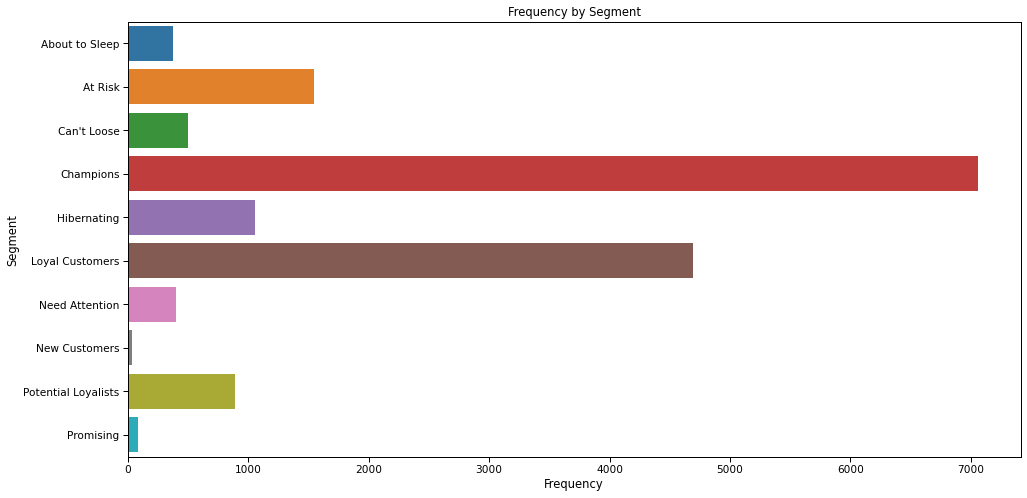

In [115]:
plt.figure(figsize = (16,8))
ax = sns.barplot(x="Frequency", y="Segment", data=df_Segment)
ax.set_ylabel('Segment')
ax.set_title('Frequency by Segment');

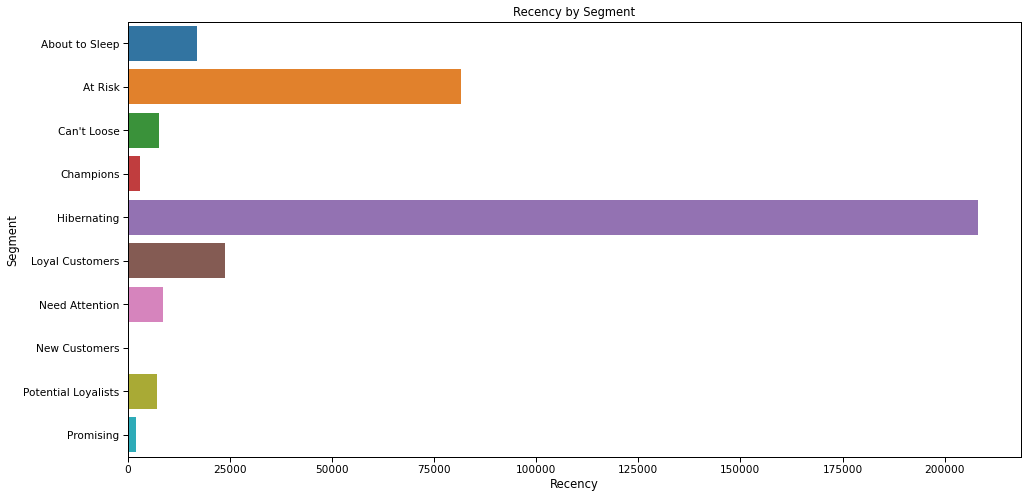

In [116]:
plt.figure(figsize = (16,8))
ax = sns.barplot(x="Recency", y="Segment", data=df_Segment)
ax.set_ylabel('Segment')
ax.set_title('Recency by Segment');

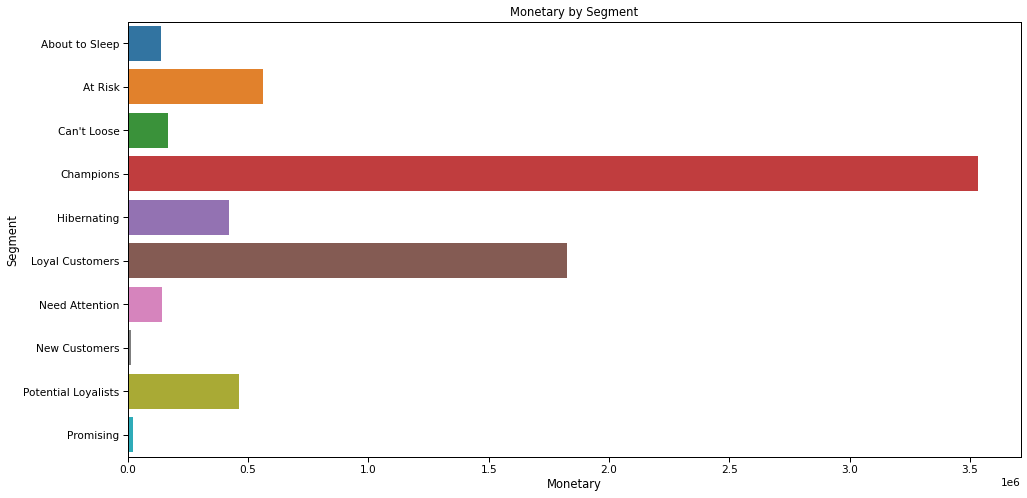

In [117]:
plt.figure(figsize = (16,8))
ax = sns.barplot(x="Monetary", y="Segment", data=df_Segment)
ax.set_ylabel('Segment')
ax.set_title('Monetary by Segment');

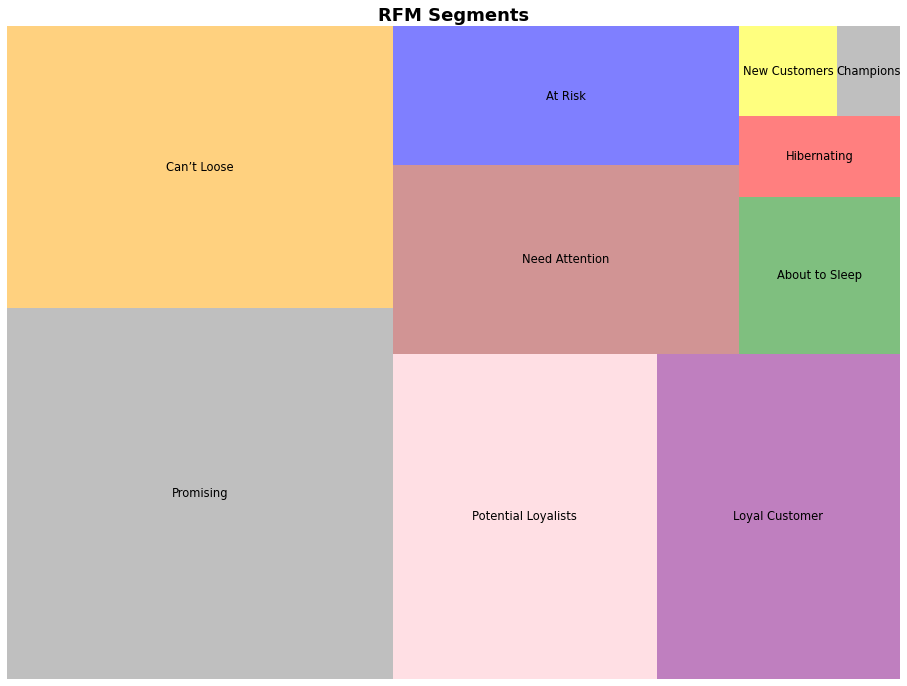

In [118]:
import squarify

squarity =rfm['Segment'] .value_counts()
color=['grey','orange','pink','purple', 'brown', 'blue', 'green', 'red', 'yellow']


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16,12)
squarify.plot(sizes= squarity , 
              label=['Promising',
                     'Can’t Loose',
                     'Potential Loyalists',
                     'Loyal Customer',
                     'Need Attention',
                     'At Risk',
                    'About to Sleep',
                     'Hibernating',
                    'New Customers',
                     'Champions',] ,color = color, alpha=0.5,)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()


# 3. Applying K-Means Clustering

Now that we have our customers segmented into 6 different categories, we can gain further insight into customer behavior by using predictive models in conjuction with out RFM model.
Possible algorithms include **Logistic Regression**, **K-means Clustering**, and **K-nearest Neighbor**. We will go with [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) since we already have our distinct groups determined. K-means has also been widely used for market segmentation and has the advantage of being simple to implement.

In [177]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

In [178]:
rfm_kmeans = rfm[["Recency","Frequency","Monetary"]]

In [179]:
sc = MinMaxScaler((0, 1))
rfm_kmeans = sc.fit_transform(rfm_kmeans)
rfm_kmeans[0:5]

array([[0.87131367, 0.        , 0.2972518 ],
       [0.00536193, 0.04784689, 0.0161598 ],
       [0.        , 1.        , 0.12729544],
       [0.0080429 , 0.01913876, 0.01575492],
       [0.0080429 , 0.01435407, 0.00362917]])

In [180]:
# Optimum Küme Sayısının Belirlenmesi
kmeans = KMeans()
ssd = []
K = range(2, 20)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(rfm_kmeans)
    ssd.append(kmeans.inertia_)

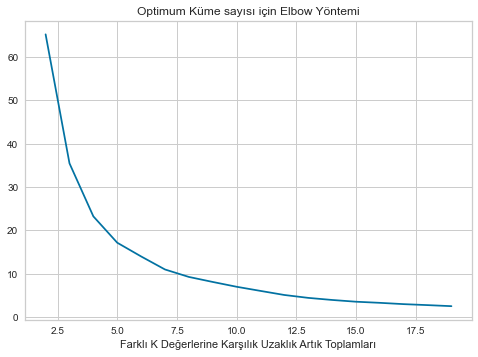

In [181]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()

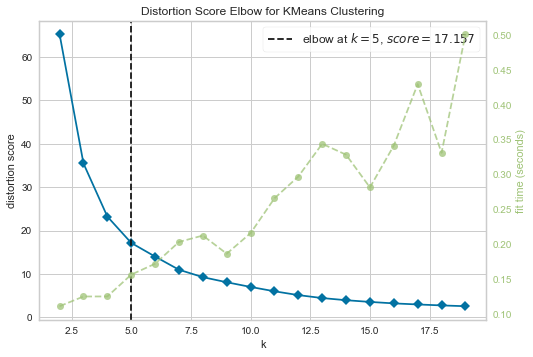

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [182]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 20))
visu.fit(rfm_kmeans)
visu.show()

In [183]:
kmeans = KMeans(n_clusters=5).fit(rfm_kmeans)

In [185]:
clusters = kmeans.labels_
rfm["cluster_no"] = clusters
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment,cluster_no
CustomerID,,,,,,,,,
12346,325,1,77184,1,1,5,115,Hibernating,4
12747,2,11,4196,5,5,5,555,Champions,0
12748,0,210,33053,5,5,5,555,Champions,0
12749,3,5,4091,5,4,5,545,Champions,0
12820,3,4,942,5,4,4,544,Champions,0


How we want to continue this analysis depends on how the business plans to use the results and the level of granularity the business stakeholders want to see in the clusters. We can also ask what range of customer behavior from high to low value customers are the stakeholders interested in exploring. From those answers, various methods of clustering can be used and applied on RFM variable or directly on the transaction data set.

**Annotation:**

Limitations of K-means clustering:

1. There is no assurance that it will lead to the global best solution.
2. Can't deal with different shapes(not circular) and consider one point's probability of belonging to more than one cluster.

These disadvantages of K-means show that for many datasets (especially low-dimensional datasets), it may not perform as well as we might hope.

# 5. Create Cohort & Conduct Cohort Analysis
[Cohort Analysis](https://medium.com/swlh/cohort-analysis-using-python-and-pandas-d2a60f4d0a4d) is specifically useful in analyzing user growth patterns for products. In terms of a product, a cohort can be a group of people with the same sign-up date, the same usage starts month/date, or the same traffic source.
Cohort analysis is an analytics method by which these groups can be tracked over time for finding key insights. This analysis can further be used to do customer segmentation and track metrics like retention, churn, and lifetime value.

For e-commerce organizations, cohort analysis is a unique opportunity to find out which clients are the most valuable to their business. by performing Cohort analysis we can get the following answers to the following questions:

- How much effective was a marketing campaign held in a particular time period?
- Did the strategy employ to improve the conversion rates of Customers worked?
- Should I focus more on retention rather than acquiring new customers?
- Are my customer nurturing strategies effective?
- Which marketing channels bring me the best results?
- Is there a seasonality pattern in Customer behavior?
- Along with various performance measures/metrics for wer organization.

Since we will be performing Cohort Analysis based on transaction records of customers, the columns we will be dealing with mainly:
- Invoice Data
- CustomerID
- Price
- Quantity

The following steps will performed to generate the Cohort Chart of Retention Rate:
- Month Extraction from InvioceDate column
- Assigning Cohort to Each Transaction
- Assigning Cohort Index to each transaction
- Calculating number of unique customers in each Group of (ChortDate,Index)
- Creating Cohort Table for Retention Rate
- Creating the Cohort Chart using the Cohort Table

The Detailed information about each step is given below:

## Feature Engineering

### i. Extract the Month of the Purchase
First we will create a function, which takes any date and returns the formatted date with day value as 1st of the same month and Year.

In [119]:
# Define a function that will parse the date
def get_month(x):
    return dt.datetime(x.year,x.month,1) 

# Create InvoiceMonth column
df_uk['InvoiceMonth'] = df_uk['InvoiceDate'].apply(get_month) 

# Group by CustomerID and select the InvoiceMonth value
# grouping = df_uk.groupby('CustomerID')['InvoiceMonth'] 

# Assign a minimum InvoiceMonth value to the dataset
df_uk['CohortMonth'] = df_uk.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [120]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,3,17850,United Kingdom,15,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3,17850,United Kingdom,20,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,3,17850,United Kingdom,22,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3,17850,United Kingdom,20,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3,17850,United Kingdom,20,2010-12-01,2010-12-01


In [121]:
df_uk[df_uk['CustomerID'] == 12830]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth
234640,557571,22536,MAGIC DRAWING SLATE PURDEY,192,2011-06-21,0,12830,United Kingdom,52,2011-06-01,2011-06-01
234641,557571,22535,MAGIC DRAWING SLATE BUNNIES,192,2011-06-21,0,12830,United Kingdom,52,2011-06-01,2011-06-01
234642,557571,22533,MAGIC DRAWING SLATE BAKE A CAKE,192,2011-06-21,0,12830,United Kingdom,52,2011-06-01,2011-06-01
234643,557571,22532,MAGIC DRAWING SLATE LEAP FROG,192,2011-06-21,0,12830,United Kingdom,52,2011-06-01,2011-06-01
234644,557571,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,576,2011-06-21,1,12830,United Kingdom,495,2011-06-01,2011-06-01
234645,557571,21890,S/6 WOODEN SKITTLES IN COTTON BAG,100,2011-06-21,2,12830,United Kingdom,226,2011-06-01,2011-06-01
234646,557571,21891,TRADITIONAL WOODEN SKIPPING ROPE,288,2011-06-21,1,12830,United Kingdom,360,2011-06-01,2011-06-01
234647,557571,22550,HOLIDAY FUN LUDO,72,2011-06-21,3,12830,United Kingdom,189,2011-06-01,2011-06-01
234648,557571,21703,BAG 125g SWIRLY MARBLES,288,2011-06-21,0,12830,United Kingdom,78,2011-06-01,2011-06-01
234649,557571,21912,VINTAGE SNAKES & LADDERS,72,2011-06-21,3,12830,United Kingdom,189,2011-06-01,2011-06-01


### ii. Calculating time offset in Months i.e. Cohort Index:
Calculating time offset for each transaction will allows us to report the metrics for each cohort in a comparable fashion.
First, we will create 4 variables that capture the integer value of years, months for Invoice and Cohort Date using the get_date_int() function which we'll create it below.

In [122]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

invoice_year, invoice_month = get_date_int(df_uk,'InvoiceMonth')
cohort_year, cohort_month = get_date_int(df_uk,'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
df_uk['CohortIndex'] = years_diff * 12 + months_diff
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,3,17850,United Kingdom,15,2010-12-01,2010-12-01,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3,17850,United Kingdom,20,2010-12-01,2010-12-01,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,3,17850,United Kingdom,22,2010-12-01,2010-12-01,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3,17850,United Kingdom,20,2010-12-01,2010-12-01,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3,17850,United Kingdom,20,2010-12-01,2010-12-01,0


In [123]:
df_uk.groupby('CustomerID')['CohortIndex'].value_counts()

CustomerID  CohortIndex
12346       0               1
12747       5              23
            0              15
            10             15
            3              12
                           ..
18283       9              38
            4              37
            1              29
18287       5              41
            0              29
Name: CohortIndex, Length: 11791, dtype: int64

In [124]:
df_uk.CustomerID.nunique()

3921

In [125]:
df_uk[df_uk['CohortIndex'] == 6]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth,CohortIndex
209191,555194,21988,PACK OF 6 SKULL PAPER PLATES,96,2011-06-01,1,16422,United Kingdom,61,2011-06-01,2010-12-01,6
209192,555194,21989,PACK OF 20 SKULL PAPER NAPKINS,96,2011-06-01,1,16422,United Kingdom,69,2011-06-01,2010-12-01,6
209193,555194,21243,PINK POLKADOT PLATE,96,2011-06-01,1,16422,United Kingdom,139,2011-06-01,2010-12-01,6
209194,555194,21380,WOODEN HAPPY BIRTHDAY GARLAND,12,2011-06-01,3,16422,United Kingdom,35,2011-06-01,2010-12-01,6
209195,555194,22090,PAPER BUNTING RETROSPOT,40,2011-06-01,3,16422,United Kingdom,102,2011-06-01,2010-12-01,6
...,...,...,...,...,...,...,...,...,...,...,...,...
540416,581482,22371,AIRLINE BAG VINTAGE TOKYO 78,12,2011-12-09,4,17490,United Kingdom,47,2011-12-01,2011-06-01,6
540417,581482,21875,KINGS CHOICE MUG,36,2011-12-09,1,17490,United Kingdom,38,2011-12-01,2011-06-01,6
540418,581482,23251,VINTAGE RED ENAMEL TRIM MUG,96,2011-12-09,1,17490,United Kingdom,100,2011-12-01,2011-06-01,6
540419,581482,23300,GARDENERS KNEELING PAD CUP OF TEA,48,2011-12-09,1,17490,United Kingdom,70,2011-12-01,2011-06-01,6


## 1st Cohort: User number & Retention Rate

In [157]:
grouping = df_uk.groupby(['CohortMonth', 'CohortIndex'])

In [158]:
cohort_data = grouping['CustomerID'].nunique()

In [159]:
df_uk.CustomerID.nunique()

3921

In [163]:
cohort_data.head(38)

CohortMonth  CohortIndex
2010-12-01   0              815
             1              289
             2              263
             3              304
             4              293
             5              323
             6              291
             7              278
             8              289
             9              325
             10             299
             11             405
             12             218
2011-01-01   0              358
             1               76
             2               93
             3               84
             4              119
             5               99
             6               90
             7               87
             8              108
             9              117
             10             127
             11              43
2011-02-01   0              340
             1               64
             2               66
             3               97
             4               98
             5 

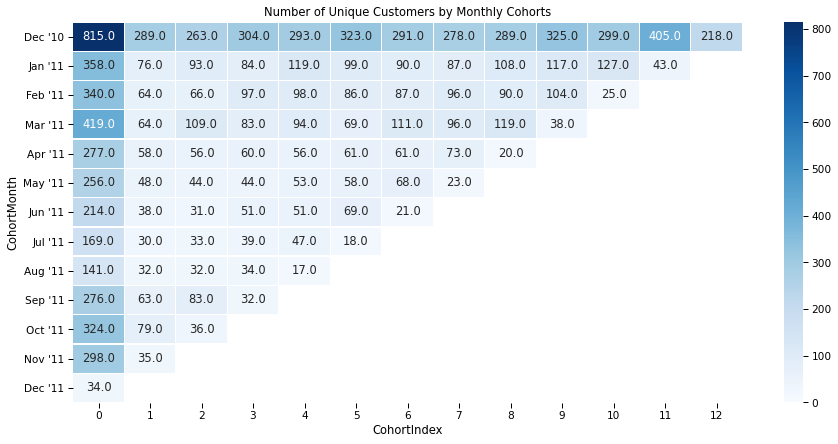

In [164]:
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11",\
              "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]


plt.figure(figsize=(15,7))


plt.title('Number of Unique Customers by Monthly Cohorts')

sns.heatmap(data=cohort_counts,
            annot = True,
            cmap = "Blues",
            vmin = 0.0,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)

plt.show();

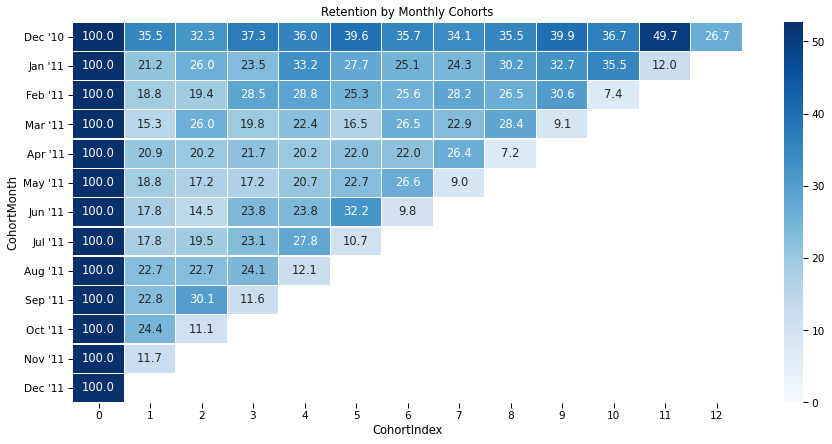

In [165]:
grouping = df_uk.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

cohort_sizes = cohort_counts.iloc[:,0]

retention = cohort_counts.divide(cohort_sizes, axis=0)*100

month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11",\
              "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]


plt.figure(figsize=(15,7))


plt.title('Retention by Monthly Cohorts')

sns.heatmap(data=retention,
            annot = True,
            cmap = "Blues",
            vmin = 0.0,
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)

plt.show();

In [166]:
cohort_sizes = cohort_counts.iloc[:,0]
cohort_sizes

CohortMonth
2010-12-01   815
2011-01-01   358
2011-02-01   340
2011-03-01   419
2011-04-01   277
2011-05-01   256
2011-06-01   214
2011-07-01   169
2011-08-01   141
2011-09-01   276
2011-10-01   324
2011-11-01   298
2011-12-01    34
Name: 0, dtype: float64

In [167]:
retention = cohort_counts.divide(cohort_sizes, axis=0)*100
retention

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,100,35,32,37,36,40,36,34,35,40,37,50,27
2011-01-01,100,21,26,23,33,28,25,24,30,33,35,12,NaN
2011-02-01,100,19,19,29,29,25,26,28,26,31,7,NaN,NaN
2011-03-01,100,15,26,20,22,16,26,23,28,9,NaN,NaN,NaN
2011-04-01,100,21,20,22,20,22,22,26,7,NaN,NaN,NaN,NaN
2011-05-01,100,19,17,17,21,23,27,9,NaN,NaN,NaN,NaN,NaN
2011-06-01,100,18,14,24,24,32,10,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100,18,20,23,28,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100,23,23,24,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2nd Cohort: Average Quantity Sold

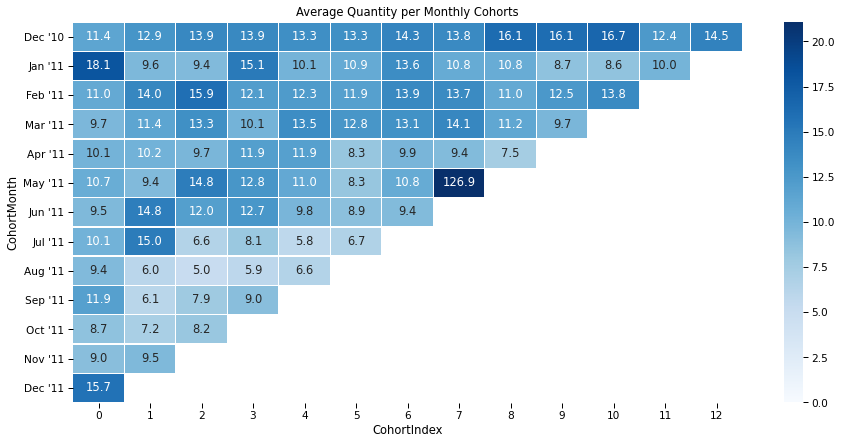

In [168]:
grouping = df_uk.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the Quantity column
cohort_data = grouping['Quantity'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')

# Initialize plot figure
plt.figure(figsize=(15, 7))

# Add a title
plt.title('Average Quantity per Monthly Cohorts')

# Create the heatmap
sns.heatmap(data = average_quantity,
            annot=True,
            vmin = 0.0,
            cmap='Blues',
            vmax = list(average_quantity.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)
plt.show();

## 3rd Cohort: Average Sales

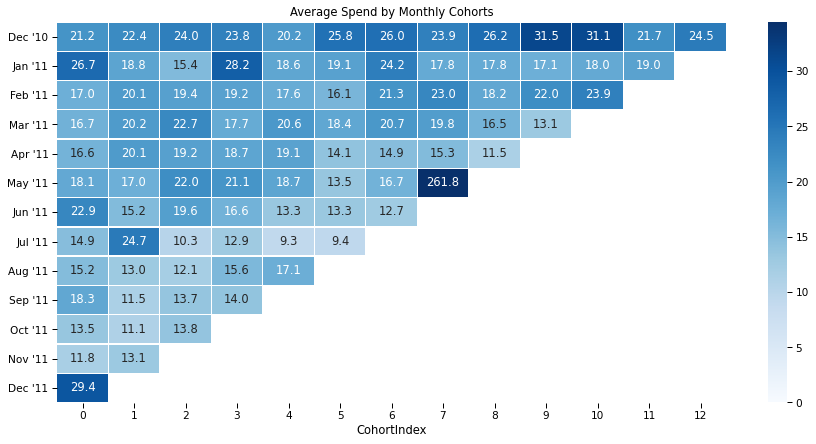

In [169]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = df_uk.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['TotalPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='TotalPrice')
average_price.round(1)
average_price.index = average_price.index.date

# Initialize plot figure
plt.figure(figsize=(15, 7))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data = average_price,
            annot=True,
            vmin = 0.0,

            cmap='Blues',
            vmax = list(average_price.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)
plt.show();